In [2]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import randint, uniform

# Sklearn
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sklearn.metrics as metrics
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor  # For regression
from sklearn.ensemble import RandomForestClassifier  # For classification
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.neighbors import KNeighborsRegressor

pd.options.display.float_format = '{:.2f}'.format

## IMPORT & EXPLORE

In [4]:
movielens_user_movies_sample_interaction_data = pd.read_csv(r"C:\Users\User\Desktop\MovieLens Project\data\movielens_user_movies_sample_interaction_data.csv.gz")

In [5]:
movielens_user_movies_sample_interaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362222 entries, 0 to 362221
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   movie_id               362222 non-null  int64  
 1   user_id                362222 non-null  int64  
 2   user_rating            362222 non-null  float64
 3   movie_title            362222 non-null  object 
 4   year                   362222 non-null  int64  
 5   clean_movie_title      362222 non-null  object 
 6   tconst                 362222 non-null  object 
 7   isadult                362222 non-null  int64  
 8   runtimeminutes         361621 non-null  float64
 9   genres                 362222 non-null  object 
 10  genres_code            362222 non-null  int64  
 11  averagerating          362222 non-null  float64
 12  numvotes               362222 non-null  int64  
 13  user_zip_code          357430 non-null  float64
 14  user_gender            362222 non-nu

In [26]:
movielens_user_movies_sample_interaction_data.sample(5)

,movie_id,user_id,user_rating,movie_title,year,clean_movie_title,tconst,isadult,runtimeminutes,genres,genres_code,averagerating,numvotes,user_zip_code,user_gender,bucketized_user_age,user_occupation_label,user_occupation_text
93383,1682,787,5.00,"Truman Show, The (1998)",1998,The Truman Show,tt0120382,0,103.00,"Comedy,Drama",156,8.20,1257742,77802.00,True,18,17,college/grad student
144291,1220,1031,3.00,"Blues Brothers, The (1980)",1980,The Blues Brothers,tt0080455,0,133.00,"Adventure,Comedy,Crime",67,7.90,220159,19803.00,True,35,16,self-employed
9398,1500,1207,3.00,Grosse Pointe Blank (1997),1997,Grosse Pointe Blank,tt0119229,0,107.00,"Action,Comedy,Crime",18,7.30,101777,43617.00,True,50,11,other/not specified
269865,3811,2349,4.00,Breaker Morant (1980),1980,Breaker Morant,tt0080310,0,107.00,"Drama,History,War",261,7.80,14810,50309.00,True,25,7,farmer
349831,595,4258,5.00,Beauty and the Beast (1991),1991,Beauty and the Beast,tt0101414,0,84.00,"Animation,Family,Fantasy",118,8.00,489584,19711.00,True,25,18,technician/engineer


### EDA

In [9]:
movielens_user_movies_sample_interaction_data_num = movielens_user_movies_sample_interaction_data.select_dtypes(include = ('number'))

movielens_user_movies_sample_interaction_data_corr = movielens_user_movies_sample_interaction_data_num.corr()


In [28]:
movielens_user_movies_sample_interaction_data_corr

,movie_id,user_id,user_rating,year,isadult,runtimeminutes,genres_code,averagerating,numvotes,user_zip_code,bucketized_user_age,user_occupation_label
movie_id,1.00,-0.02,-0.06,-0.01,NaN,-0.08,0.03,-0.16,-0.20,0.00,0.03,-0.00
user_id,-0.02,1.00,0.01,-0.03,NaN,0.01,0.01,0.02,-0.00,0.03,0.04,-0.05
user_rating,-0.06,0.01,1.00,-0.16,NaN,0.14,0.06,0.43,0.22,0.01,0.06,-0.01
year,-0.01,-0.03,-0.16,1.00,NaN,0.01,-0.09,-0.29,0.07,-0.01,-0.17,0.04
isadult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
runtimeminutes,-0.08,0.01,0.14,0.01,NaN,1.00,0.05,0.36,0.33,0.00,0.06,-0.02
genres_code,0.03,0.01,0.06,-0.09,NaN,0.05,1.00,0.12,-0.03,0.01,0.05,-0.03
averagerating,-0.16,0.02,0.43,-0.29,NaN,0.36,0.12,1.00,0.58,0.00,0.08,-0.03
numvotes,-0.20,-0.00,0.22,0.07,NaN,0.33,-0.03,0.58,1.00,-0.01,-0.03,0.01
user_zip_code,0.00,0.03,0.01,-0.01,NaN,0.00,0.01,0.00,-0.01,1.00,0.05,-0.03


In [37]:
# let's get some descriptive statistic 

movielens_user_movies_sample_interaction_data_genres_ratings = movielens_user_movies_sample_interaction_data.groupby( 'genres' ).agg( num_ratings = ('user_rating','count') ,
                                                                                                                                      avg_user_rating = ('user_rating','mean'),
                                                                                                                                      median_user_rating  = ('user_rating','mean'),
                                                                                                                                      mean_user_age = ('bucketized_user_age','mean')).reset_index() 


Text(0.5, 1.0, 'TOP 20 MOVIE GENRES IN SAMPLE (NUMBER OF RATINGS)')

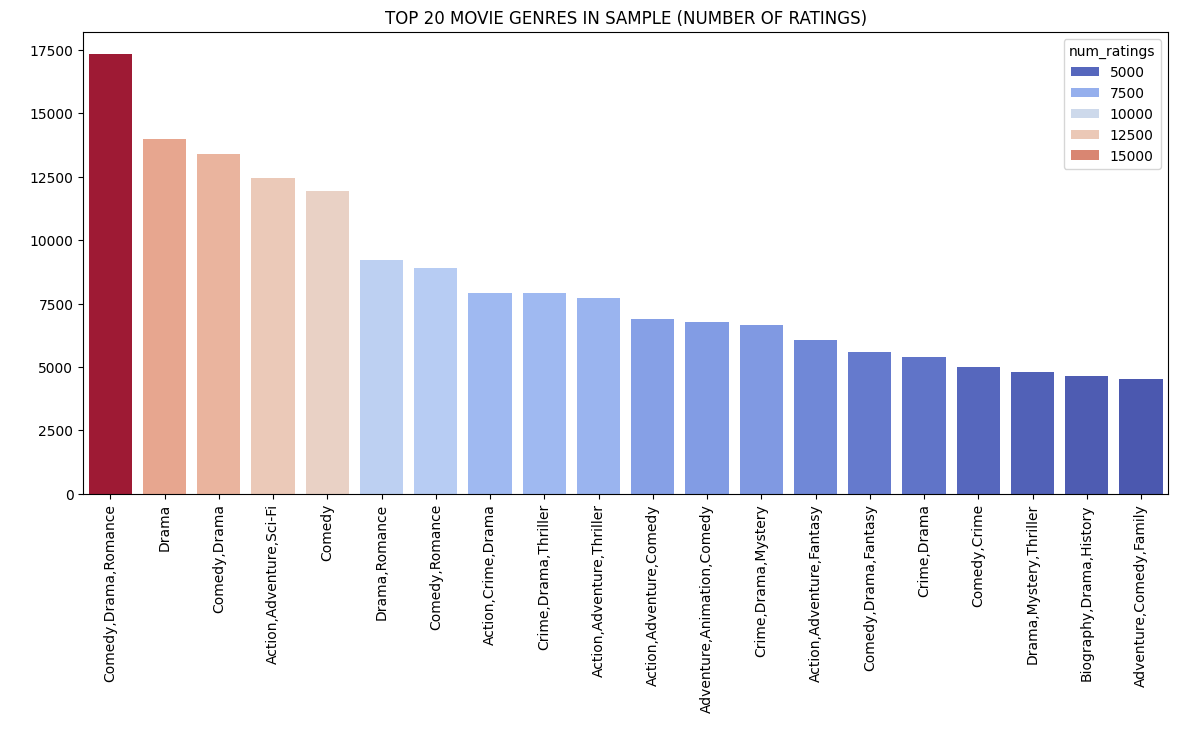

In [122]:
top_20_genres = movielens_user_movies_sample_interaction_data_genres_ratings[['genres','num_ratings','median_user_rating']].sort_values(by = 'num_ratings',ascending = False).head(20)


plt.figure(figsize = (14,6))
plt.xticks(rotation = 90)
plt.xlabel(' ')
plt.ylabel(' ')

sns.barplot( data = top_20_genres ,
             x = 'genres',
             y = 'num_ratings',
             hue = 'num_ratings',
             palette = 'coolwarm')

plt.title('TOP 20 MOVIE GENRES IN SAMPLE (NUMBER OF RATINGS)')

Text(0.5, 1.0, 'TOP 20 MOVIE GENRES IN SAMPLE (MEDIAN USER RATINGS)')

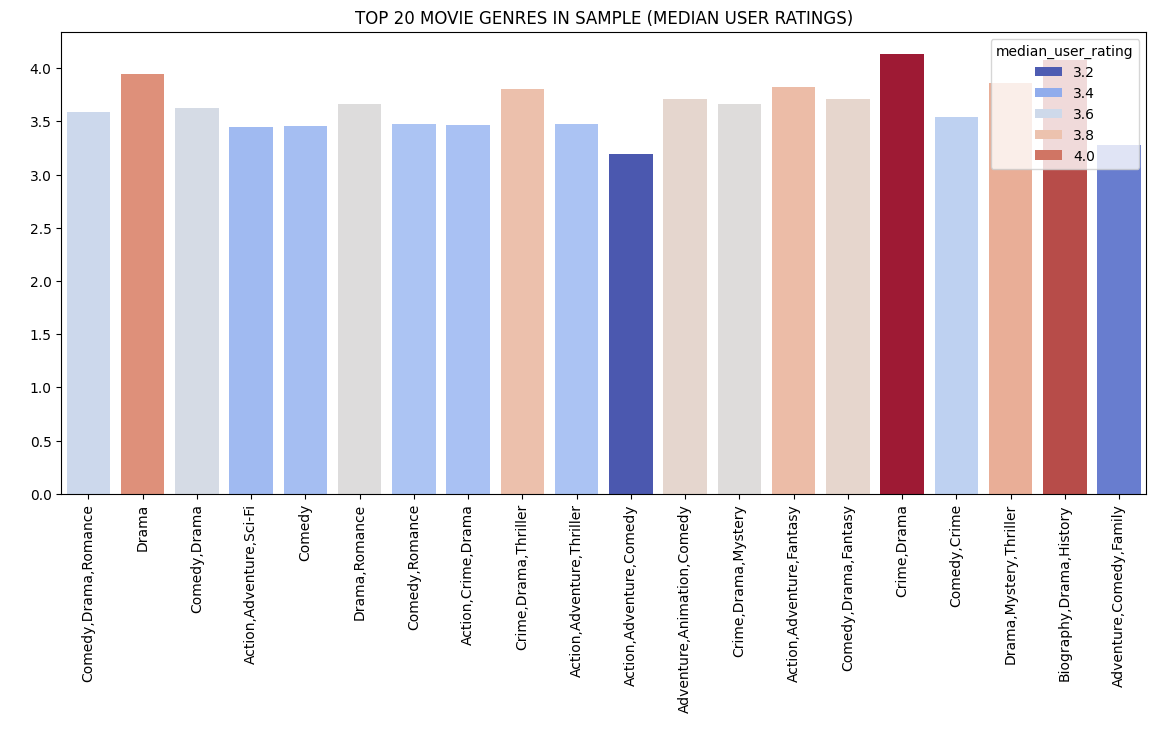

In [124]:
plt.figure(figsize = (14,6))
plt.xticks(rotation = 90)
plt.xlabel(' ')
plt.ylabel(' ')

sns.barplot( data = top_20_genres,
             x = 'genres',
             y = 'median_user_rating',
             hue = 'median_user_rating',
             palette = 'coolwarm')

plt.title('TOP 20 MOVIE GENRES IN SAMPLE (MEDIAN USER RATINGS)')

## CLEAN & PREPARE

#### Feature Renaming

In [128]:
movielens_user_movies_sample_interaction_data.rename( columns = { 'averagerating' : 'imdb_avg_rating', 
                                                                  'numvotes' : 'imdb_num_votes'} ,inplace = True)

#### Categorical Features Encoding

In [136]:
# There's also user_gender feature which should be encoded

movielens_user_movies_sample_interaction_data['user_gender_code'] = movielens_user_movies_sample_interaction_data['user_gender'].astype('category').cat.codes

In [150]:
# let's drop rows with NaN's

movielens_user_movies_sample_interaction_data.dropna(inplace = True)

# and let's also change float dtypes to int 

movielens_user_movies_sample_interaction_data['user_zip_code'] = movielens_user_movies_sample_interaction_data['user_zip_code'].astype('int')


In [174]:
movielens_user_movies_sample_interaction_data['isadult'].unique()

array([0], dtype=int64)

#### Prepare data for model building

In [6]:
movielens_user_movies_sample_interaction_data_independent = movielens_user_movies_sample_interaction_data.select_dtypes(include = ('number')).drop(columns = ['movie_id','user_id','user_rating',
                                                                                                                                                              'isadult'])

movielens_user_movies_sample_interaction_data_dependent = movielens_user_movies_sample_interaction_data['user_rating']

# i droped column 'isadult' because in our sample all movies has label 0 which does not neccesary mean that they're all for children
# This column will not provide any useful info for the models in our case , so , it will not be using by me.

movielens_user_movies_sample_interaction_data_independent_train , movielens_user_movies_sample_interaction_data_independent_test , movielens_user_movies_sample_interaction_data_dependent_train , movielens_user_movies_sample_interaction_data_dependent_test = train_test_split(
    movielens_user_movies_sample_interaction_data_independent ,
    movielens_user_movies_sample_interaction_data_dependent ,
    train_size = 0.9 ,
    stratify = movielens_user_movies_sample_interaction_data_dependent ,
    random_state = 42
) 


In [29]:
print(f'INDEPENDENT SUBSETS SHAPE (TRAIN-TEST) : {movielens_user_movies_sample_interaction_data_independent_train.shape , movielens_user_movies_sample_interaction_data_independent_test.shape}')

INDEPENDENT SUBSETS SHAPE (TRAIN-TEST) : ((321150, 9), (35684, 9))


In [10]:
movielens_user_movies_sample_interaction_data_dependent.value_counts(normalize = True)

user_rating
4.00   0.35
3.00   0.26
5.00   0.22
2.00   0.11
1.00   0.05
Name: proportion, dtype: float64

In order to build best possible recommeder system , i will try different models for this task , when we dealing numerical ratings with 5 possible values as in our case , built model can be as classification and as a regression one. 

i will try :

HistGradientBoostingRegressor

ExtraTreesRegressor


## MODEL BUILDING

#### HistGradientBoosting

In [257]:
movielens_user_movies_rating_hist_gradient_boosting_param_distributions = {
                                                                            'max_iter': [200, 250,300, 500, 1000],  
                                                                            'learning_rate': [0.01, 0.05, 0.1, 0.2],  
                                                                            'max_depth': [3, 5, 7, 9],  
                                                                            'max_leaf_nodes': [10, 20, 30, 50],  
                                                                            'min_samples_leaf': [1, 3, 5, 10],  
                                                                            'l2_regularization': [0, 0.1, 1, 10]
                                                                           }


In [259]:
movielens_user_movies_rating_hist_gradient_boosting_random_search_cv = RandomizedSearchCV( estimator = HistGradientBoostingRegressor() ,
                                                                                           param_distributions = movielens_user_movies_rating_hist_gradient_boosting_param_distributions ,
                                                                                           n_iter = 12 , 
                                                                                           cv = 6, 
                                                                                           scoring = 'neg_mean_absolute_error',
                                                                                           random_state = 42 )

In [261]:
movielens_user_movies_rating_hist_gradient_boosting_random_search_cv.fit(movielens_user_movies_sample_interaction_data_independent_train ,
                                                                         movielens_user_movies_sample_interaction_data_dependent_train)

RandomizedSearchCV(cv=6, estimator=HistGradientBoostingRegressor(), n_iter=12,
                   param_distributions={'l2_regularization': [0, 0.1, 1, 10],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'max_iter': [200, 250, 300, 500, 1000],
                                        'max_leaf_nodes': [10, 20, 30, 50],
                                        'min_samples_leaf': [1, 3, 5, 10]},
                   random_state=42, scoring='neg_mean_absolute_error')

In [265]:
abs(movielens_user_movies_rating_hist_gradient_boosting_random_search_cv.best_score_)

0.7501772673182995

In [34]:
# now , let's test build model 

movielens_user_movies_rating_hist_gradient_boosting_random_search_cv_predictions = movielens_user_movies_rating_hist_gradient_boosting_random_search_cv.predict(movielens_user_movies_sample_interaction_data_independent_test)

movielens_user_movies_rating_hist_gradient_boosting_random_search_cv_predictions_mae = metrics.mean_absolute_error( movielens_user_movies_sample_interaction_data_dependent_test , 
                                                                                                                    movielens_user_movies_rating_hist_gradient_boosting_random_search_cv_predictions)

NameError: name 'movielens_user_movies_rating_hist_gradient_boosting_random_search_cv' is not defined

In [288]:
movielens_user_movies_rating_hist_gradient_boosting_random_search_cv_predictions_mae

0.7440283544867589

##### Adding more iterations

In [36]:
# Now , let's try add more iterations and see if it helps 

movielens_user_movies_rating_hist_gradient_boosting = HistGradientBoostingRegressor(l2_regularization=0, 
                                                                                    max_depth=7, 
                                                                                    max_iter=5000, # x10
                                                                                     max_leaf_nodes=50, 
                                                                                    min_samples_leaf=1)

movielens_user_movies_rating_hist_gradient_boosting.fit(movielens_user_movies_sample_interaction_data_independent_train,
                                                        movielens_user_movies_sample_interaction_data_dependent_train)


HistGradientBoostingRegressor(l2_regularization=0, max_depth=7, max_iter=5000,
                              max_leaf_nodes=50, min_samples_leaf=1)

In [38]:
movielens_user_movies_rating_hist_gradient_boosting_predictions = movielens_user_movies_rating_hist_gradient_boosting.predict(movielens_user_movies_sample_interaction_data_independent_test)

movielens_user_movies_rating_hist_gradient_boosting_predictions_mae = metrics.mean_absolute_error( movielens_user_movies_sample_interaction_data_dependent_test ,
                                                                                                   movielens_user_movies_rating_hist_gradient_boosting_predictions)


In [40]:
movielens_user_movies_rating_hist_gradient_boosting_predictions_mae

0.7408826235056046

And , yes , more iterations improved MAE , but not highly (- 0.06 MAE score cost 4500 additional iterations ) . In order to achieve even higher model performance , it's worth trying to increase more and more 'max_iter' parameter , but of course model will become more and more complex.

#### ExtraTrees

In [112]:
from sklearn.ensemble import ExtraTreesRegressor

In [139]:
movielens_user_movies_rating_extra_trees = ExtraTreesRegressor(n_estimators = 200,
                                                               max_depth = 20 ,
                                                               max_features = 'sqrt',
                                                               random_state = 42)

In [141]:
movielens_user_movies_rating_extra_trees.fit(movielens_user_movies_sample_interaction_data_independent_train,
                                             movielens_user_movies_sample_interaction_data_dependent_train)

ExtraTreesRegressor(max_depth=20, max_features='sqrt', n_estimators=200,
                    random_state=42)

In [143]:
movielens_user_movies_rating_extra_trees_predictions = movielens_user_movies_rating_extra_trees.predict(movielens_user_movies_sample_interaction_data_independent_test)

movielens_user_movies_rating_extra_trees_predictions_mae = metrics.mean_absolute_error(movielens_user_movies_sample_interaction_data_dependent_test,
                                                                                       movielens_user_movies_rating_extra_trees_predictions)


In [145]:
movielens_user_movies_rating_extra_trees_predictions_mae

0.7809332715610745

In [147]:
from joblib import dump

dump(movielens_user_movies_rating_extra_trees,'movielens_user_movies_rating_extra_trees.joblib')


['movielens_user_movies_rating_extra_trees.joblib']